# PyTorch Custom Datasets

We've used some datasets with PyTorch before.

But how do you get your own data into PyTorch?

One of the way to do so is via custom data

### Domain libraries

Depending on what you're woking on, vision, text, audio, recommendation, you want to look into each of the PyTorch domain libraries for the existing data loading functions and customizable data loading functions.


Book version : https://www.learnpytorch.io/04_pytorch_custom_datasets/



## 0. Importing and setting up device-agnostic code

In [ ]:
import torch
import torchvision
from torch import nn

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get Data

Our dataset is the subset of the Food101  dataset.

Food101 starts 101 different classses of the food and 1000 images per class( 750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the image( 75 training, 25 testing).

Why do this?

When starting out ML projects, it's important to try things on small scale and then increase the scale when necessary. The whole point is to speed up how fast you can experiment.


101 food datasets : https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

In [ ]:
import requests
import zipfile
from pathlib import Path

# setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it....
if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


## 2. Becoming one with the data (data preparation and data exploration)


In [ ]:
import os
def walk_trough_dir(dir_path):
  """ walks through dir_path returing its content """
  for dir_path, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dir_path}")


In [ ]:
walk_trough_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi


In [ ]:
# setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize the image

1. Get all of the image paths
2. Pick a random image using Python's random.choice()
3. Get the image class name using `pathlip.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata


Random image path : data/pizza_steak_sushi/train/pizza/3281494.jpg
Image class : pizza
Image size : (512, 288)
Image channels : ('R', 'G', 'B')


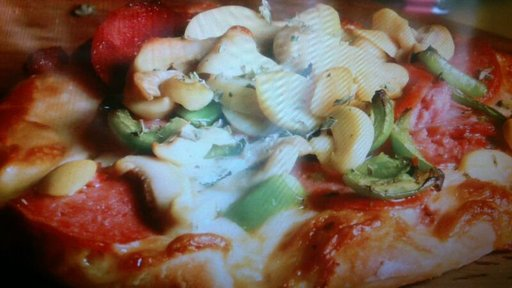

In [ ]:
import random
from PIL import Image

# random.seed(42)

# 1.get all image paths
image_paths = list(image_path.glob("*/*/*.jpg"))

# 2.pick random image
random_image_path = random.choice(image_paths)

# 3. get image class from path name
image_class = random_image_path.parent.stem

# 4. open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image size : {img.size}")
print(f"Image channels : {img.getbands()}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(287.5), np.float64(-0.5))

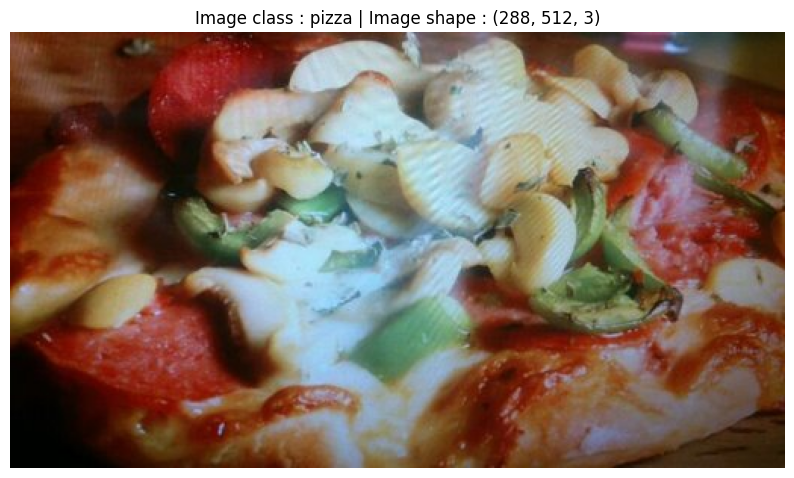

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt

# turn the image into an array
img_arr = np. asarray(img)

# plot image
plt.figure(figsize=(10,7))
plt.imshow(img_arr)
plt.title(f"Image class : {image_class} | Image shape : {img_arr.shape}")
plt.axis(False)

array([[[121,  63,  39],
        [127,  70,  43],
        [130,  73,  46],
        ...,
        [ 38,  34,   5],
        [ 37,  33,   4],
        [ 37,  33,   4]],

       [[121,  63,  39],
        [125,  67,  43],
        [128,  71,  44],
        ...,
        [ 39,  35,   6],
        [ 39,  35,   6],
        [ 39,  35,   6]],

       [[123,  65,  43],
        [126,  68,  44],
        [128,  70,  46],
        ...,
        [ 42,  37,   7],
        [ 42,  37,   7],
        [ 42,  37,   7]],

       ...,

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 49,  31,   9],
        [ 49,  31,   9],
        [ 49,  31,   9]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 50,  32,  10],
        [ 52,  34,  12],
        [ 54,  36,  14]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 52,  34,  12],
        [ 55,  37,  15],
        [ 58,  40,  18]]], dtype=uint8)
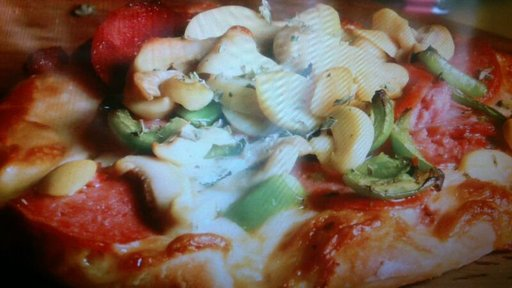

In [ ]:
img_arr

## 3. Transforming data

Before we can use our image data with PyTorch:

1. Turn your target data into tensors (in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

Transforms help you to get your images ready to used with a model/perform data  augmentation

In [ ]:
# write a transform for image
data_transform = transforms.Compose([
    transforms.Resize(size=(256,256)), # Resize
    transforms.RandomHorizontalFlip(p=0.5), # flipping
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.4902, 0.4902, 0.4667,  ..., 0.1451, 0.1490, 0.1451],
         [0.4863, 0.4824, 0.4745,  ..., 0.1529, 0.1569, 0.1569],
         [0.4941, 0.4902, 0.4863,  ..., 0.1608, 0.1647, 0.1686],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.1922, 0.1922, 0.1882],
         [0.0000, 0.0000, 0.0000,  ..., 0.1922, 0.1961, 0.2039],
         [0.0000, 0.0000, 0.0000,  ..., 0.1922, 0.2000, 0.2196]],

        [[0.2627, 0.2667, 0.2471,  ..., 0.1294, 0.1333, 0.1294],
         [0.2588, 0.2588, 0.2549,  ..., 0.1373, 0.1412, 0.1412],
         [0.2667, 0.2627, 0.2627,  ..., 0.1412, 0.1451, 0.1451],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.1216, 0.1216, 0.1176],
         [0.0078, 0.0078, 0.0078,  ..., 0.1216, 0.1255, 0.1333],
         [0.0078, 0.0078, 0.0078,  ..., 0.1216, 0.1294, 0.1490]],

        [[0.1647, 0.1529, 0.1176,  ..., 0.0235, 0.0196, 0.0157],
         [0.1647, 0.1569, 0.1255,  ..., 0.0235, 0.0235, 0.0235],
         [0.1804, 0.1647, 0.1451,  ..., 0.0275, 0.0275, 0.

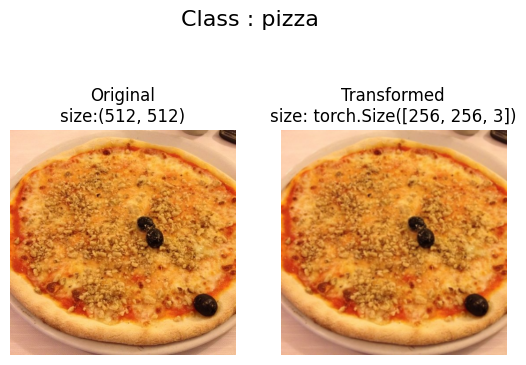

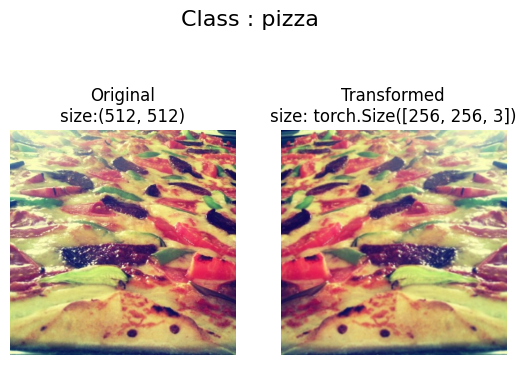

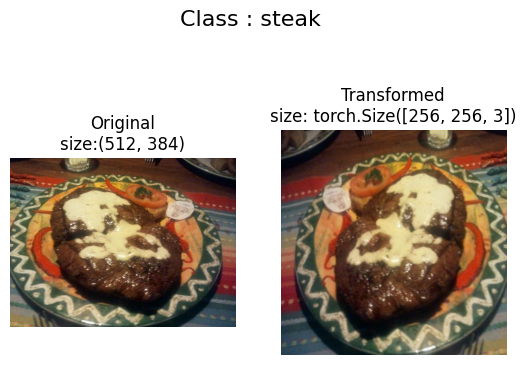

In [ ]:
def plot_transformed_images(image_paths: list, transforms, n=3, seed=42):
  """
  Selects random image from a path of images and loads/transforms
  them then plots original vs the transformed version
  """
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nsize:{f.size}")
      ax[0].axis(False)

      # transform and plot img
      transformed_img = transforms(f).permute(1, 2, 0) # note we will need to change shape
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed\nsize: {transformed_img.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class : {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths, transforms=data_transform, n=3)

## 4. Option 1: Loading image data with **ImageFolder**

We can load image classification data using `torchvision.datasets.ImageFolder`

In [ ]:
# use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
    target_transform=None
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# get class names as dic
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
# index on the train_data dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
img.shape, label, class_names[label]

(torch.Size([3, 256, 256]), 0, 'pizza')

Original image shape : torch.Size([3, 256, 256])
Permuted image shape : torch.Size([256, 256, 3])


Text(0.5, 1.0, 'pizza')

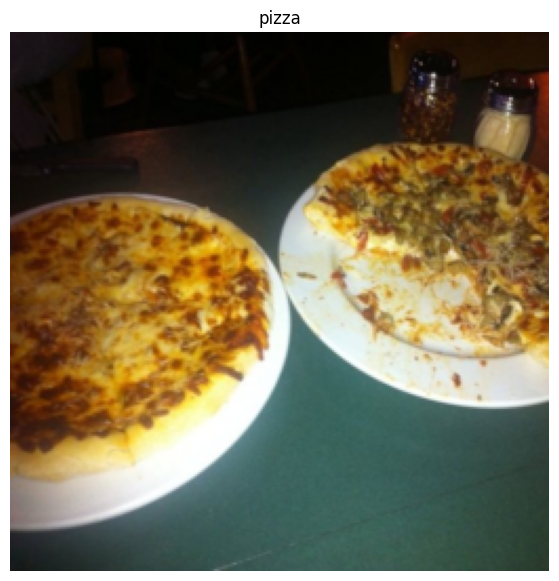

In [ ]:
# rearrange the order dim
img_permute = img.permute(1,2,0)

# print the shapes
print(f"Original image shape : {img.shape}")
print(f"Permuted image shape : {img_permute.shape}")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label])

### 4.1 Turn loaded image into DataLoaders

In [ ]:
import os
from torch.utils.data import DataLoader
os.cpu_count()

2

In [ ]:
# train_data loaders and test_data loaders
BATCH_SIZE = 32
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=True
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788605b8df10>,
 <torch.utils.data.dataloader.DataLoader at 0x788605b78410>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 256, 256])
Label shape: torch.Size([32])


## 5 Option 2: Loading Image Data with Custom dataset

1. Want to be able to load image from file
2. Want to be able to get class names from the dataset
3. Want to be able to get classes as dictionary from the dataset

PROS:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

CONS:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to error or performance issues.

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target dirctory (ideally the directory is in standard image classification formate).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the dirctory struncture).
3. Turn the class names into a dict and a list and return them.

In [ ]:
# setup path for target dirctory
traget_dirctory = train_dir
print(f"Target directory : {traget_dirctory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(traget_dirctory))])
class_names_found

Target directory : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(traget_dirctory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds class folder names in a target directory"""
  # get the class name by scanning the target dirctory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Rais ean error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}")

  # Create the class to index mapping
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [ ]:
find_classes(traget_dirctory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset
2. Init out subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
    * Paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [ ]:
# write a custom dataset class
from torch.utils.data import Dataset

# subclass
class ImageFolderCustom(Dataset):
  # initialize our custom dataset
  def __init__ (self,
                targ_dir: str,
                transform=None):
    # Create class attributes
    # get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    # setup class names
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # create a function to load image
  def load_image(self, index: int) -> Image.Image:
    """ Opens an image via a path and returns it"""
    image_path = self.paths[index]
    return Image.open(image_path)

  # overwrite __len__()
  def __len__(self):
    "Return the total number of samples."
    return len(self.paths)

  # overwrite __getitem__()
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
# Create a transform
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# test out ImageFolderCustom
train_data_custom = ImageFolderCustom(
    targ_dir=train_dir,
    transform=train_transform
)

test_data_custom = ImageFolderCustom(
    targ_dir=test_dir,
    transform=test_transform
)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x788605bb3ed0>,
 <__main__.ImageFolderCustom at 0x788605be1050>)

In [ ]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustomDtatset
print(train_data.classes == train_data_custom.classes)
print(test_data.classes == test_data_custom.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random sseed for reproducibility.
4. Get a list of random smape indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images plot them with matplotlib.
7. Make sure the dim of out images line up with matplotlib(HWC).

In [ ]:
# Create a function to take in a dataset
def display_random_images(dataset: Dataset,
                          classes: list,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = 42):
  if n > 10:
    n = 10
    display_shape = False
    print(f"for display purposes n should be less than 10, setting to 10 and removeing shape display")

  random.seed(seed)

  # get random sample imdexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))

  # loop through random indexes and plot them
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, tar_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # adjust tensor dim for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    # plot image
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    plt.title(classes[tar_label])

    if display_shape:
      print(f"Image shape : {targ_image_adjust.shape}")

Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])
Image shape : torch.Size([64, 64, 3])


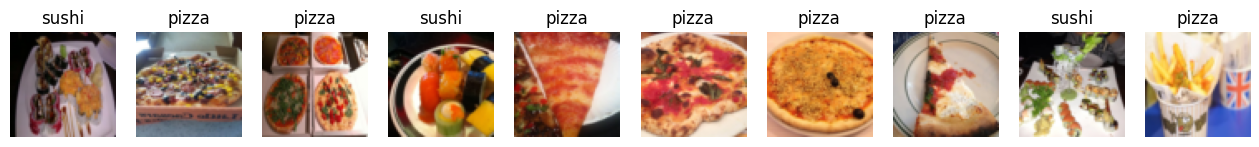

In [ ]:
display_random_images(train_data_custom, train_data_custom.classes)

### turn custom loaded images into `DataLoader's`

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=True
)
test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=False
)

In [ ]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x788605b5f3d0>,
 <torch.utils.data.dataloader.DataLoader at 0x788602276e50>)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788605b8df10>,
 <torch.utils.data.dataloader.DataLoader at 0x788605b78410>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f"Image shape: {img_custom.shape}")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


## 6. Other forms of transoform( Data Augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In case of the image data, this may mean applying various image transformation to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particualar type of data augmentation used to train PyTorch vision models to state pf the art levels...

Blog : https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [ ]:
# let's look at Trivialaugment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/12301.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3018077.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2885796.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3269634.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2760984.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1654444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/853441.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/138855.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1947572.jpg')]

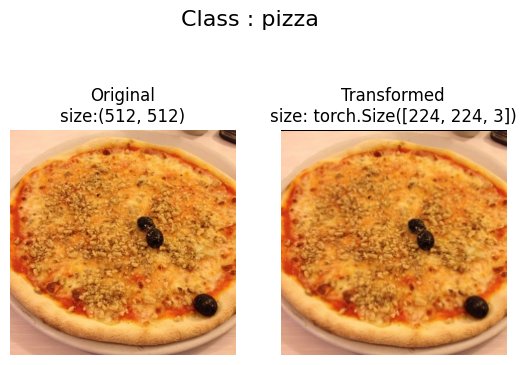

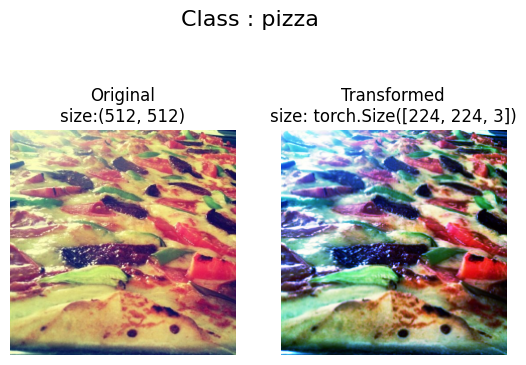

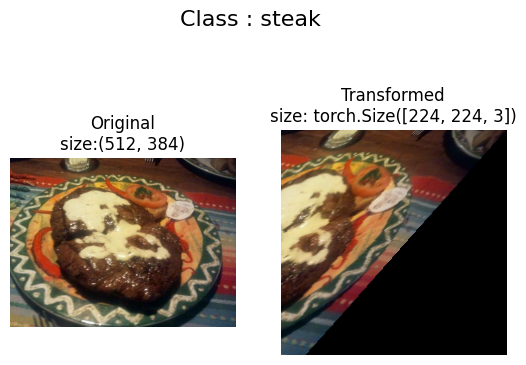

In [ ]:
# Plot random transformed image
plot_transformed_images(
    image_path_list,
    transforms=train_transform,
    n=3
)

## 7. Model 0: TinyVGG without data augmentation

https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data for model 0

In [ ]:
# create simple transform
simple_transform = transforms.Compose([
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomRotation(20),
    transforms.GaussianBlur(3),
    transforms.ToTensor(),
])

In [ ]:
# 1. Load and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)

test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform
)

# 2. turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 128
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

### 7.2 TinyVGG Model

In [ ]:
# # TinyVGG model
# class TinyVGGModelV0(nn.Module):
#   """
#   Model architecture coping TinyVGG
#   """
#   def __init__(self, input_shape: int,
#                hidden_units: int,
#                output_shape: int):
#     super().__init__()
#     self.conv_block_1 = nn.Sequential(
#         nn.Conv2d(in_channels=input_shape,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=0),
#         nn.BatchNorm2d(hidden_units),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=0),
#         nn.BatchNorm2d(hidden_units),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2,
#                      stride=2)
#     )
#     self.conv_block_2 = nn.Sequential(
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=0),
#         nn.BatchNorm2d(hidden_units),
#         nn.ReLU(),
#         nn.Dropout(p=0.3),
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=0),
#         nn.BatchNorm2d(hidden_units),
#         nn.ReLU(),
#         nn.Dropout(p=0.3),
#         nn.MaxPool2d(kernel_size=2,
#                      stride=2)
#     )
#     self.conv_block_3 = nn.Sequential(
#       nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
#       nn.BatchNorm2d(hidden_units),
#       nn.ReLU(),
#       nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
#       nn.BatchNorm2d(hidden_units),
#       nn.ReLU(),
#       nn.MaxPool2d(2, 2)
#     )

#     # self.classifier = nn.Sequential(
#     #     nn.Flatten(),
#     #     nn.Dropout(p=0.5),
#     #     nn.Linear(in_features=hidden_units*61*61,
#     #               out_features=output_shape)
#     # )

#     self.classifier = nn.Sequential(
#       nn.Flatten(),
#       nn.Dropout(p=0.5),
#       nn.Linear(hidden_units * 6 * 6, output_shape)
#     )


#   def forward(self, x):
#     x = self.conv_block_1(x)
#     # print(x.shape)
#     x = self.conv_block_2(x)
#     # print(x.shape)
#     x = self.conv_block_3(x)
#     # print(x.shape)
#     x = self.classifier(x)
#     # print(x.shape)
#     return x
#     # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benifits from operator fusion


In [ ]:
class TinyVGGModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # -> 64x64 -> 32x32

            nn.Conv2d(hidden_units, hidden_units * 2, 3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.Conv2d(hidden_units * 2, hidden_units * 2, 3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # -> 16x16

            nn.Conv2d(hidden_units * 2, hidden_units * 4, 3, padding=1),
            nn.BatchNorm2d(hidden_units * 4),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # -> 8x8

            nn.Conv2d(hidden_units * 4, hidden_units * 8, 3, padding=1),
            nn.BatchNorm2d(hidden_units * 8),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # -> 4x4

            nn.Dropout(0.3)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(hidden_units * 8 * 4 * 4, output_shape)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)


In [ ]:
torch.manual_seed(42)
model_0 = TinyVGGModelV1(
    input_shape=3,
    hidden_units=20,
    output_shape=len(train_data_simple.classes)
).to(device)
model_0

TinyVGGModelV1(
  (features): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding

### 7.3 Try forward pass on single image (to test the model)


In [ ]:
# get a single image batch
img_batch, label_batch = next(iter(train_dataloader_simple))
img_batch.shape, label_batch.shape

(torch.Size([128, 3, 64, 64]), torch.Size([128]))

In [ ]:
# try forward pass
model_0(img_batch.to(device))

tensor([[-1.4671e+00,  2.9399e-01,  4.1625e-01],
        [-2.8611e-01,  3.8306e+00, -3.1797e-01],
        [-1.4170e+00,  2.1067e+00, -1.1341e+00],
        [ 3.4275e-01,  2.3969e+00, -3.4693e-01],
        [-2.0219e-01,  1.1191e+00, -9.7590e-01],
        [ 3.5702e-01,  1.3463e+00,  3.1193e-01],
        [-7.9186e-01,  1.6218e+00,  1.3482e+00],
        [ 1.4203e-01,  1.8155e+00, -1.9475e-01],
        [-1.3738e-01,  4.6874e-01,  6.2288e-02],
        [-2.5100e-01,  8.5241e-02,  1.1161e-01],
        [-3.7828e-01,  1.5887e+00,  2.1640e-01],
        [ 5.2685e-01,  2.7677e-01, -3.1938e-01],
        [-7.5313e-01,  1.8038e-01,  4.2759e-02],
        [-8.4771e-01,  6.2085e-02, -6.5116e-02],
        [ 3.8910e-01,  2.7062e+00, -4.8655e-01],
        [-2.7641e-01,  1.7649e+00, -2.8790e-01],
        [-2.7742e-01, -1.0526e-01,  8.3609e-01],
        [-1.8911e-01,  8.3533e-01,  2.6934e-01],
        [-4.2190e-01,  4.0206e-01, -8.7386e-01],
        [-6.7757e-01,  1.8109e+00,  3.2809e-01],
        [-1.8604e+00

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModelV1                           [32, 3]                   --
├─Sequential: 1-1                        [32, 160, 4, 4]           --
│    └─Conv2d: 2-1                       [32, 20, 64, 64]          560
│    └─BatchNorm2d: 2-2                  [32, 20, 64, 64]          40
│    └─ReLU: 2-3                         [32, 20, 64, 64]          --
│    └─Conv2d: 2-4                       [32, 20, 64, 64]          3,620
│    └─BatchNorm2d: 2-5                  [32, 20, 64, 64]          40
│    └─ReLU: 2-6                         [32, 20, 64, 64]          --
│    └─MaxPool2d: 2-7                    [32, 20, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 40, 32, 32]          7,240
│    └─BatchNorm2d: 2-9                  [32, 40, 32, 32]          80
│    └─ReLU: 2-10                        [32, 40, 32, 32]          --
│    └─Conv2d: 2-11                      [32, 40, 32, 32]          14,440
│   

### 7.5 Training and Testing Loop

In [ ]:
# create train loop
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# test step
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      test_loss += loss.item()

      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(y_pred)

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Creating a train() function to combine train_step() and test_step()


In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5,
          device=device):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

### 7.7 Train and evalute the model 0

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 150

model_0 = TinyVGGModelV1(input_shape=3,
                         hidden_units=32,
                         output_shape=len(train_data_simple.classes)).to(device)

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.00001, weight_decay=0.0001)
loss_fn = nn.CrossEntropyLoss()

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.5130 | Train acc: 0.2720 | Test loss: 1.0994 | Test acc: 0.3333
Epoch: 10 | Train loss: 1.2340 | Train acc: 0.3564 | Test loss: 1.1098 | Test acc: 0.3333
Epoch: 20 | Train loss: 1.2885 | Train acc: 0.3771 | Test loss: 1.0244 | Test acc: 0.4800
Epoch: 30 | Train loss: 1.0660 | Train acc: 0.5040 | Test loss: 0.9867 | Test acc: 0.5333
Epoch: 40 | Train loss: 1.1220 | Train acc: 0.4845 | Test loss: 0.9934 | Test acc: 0.4667
Epoch: 50 | Train loss: 1.0533 | Train acc: 0.5026 | Test loss: 0.9498 | Test acc: 0.5467
Epoch: 60 | Train loss: 1.0467 | Train acc: 0.4779 | Test loss: 0.9424 | Test acc: 0.5200
Epoch: 70 | Train loss: 1.0245 | Train acc: 0.5248 | Test loss: 0.9227 | Test acc: 0.5600
Epoch: 80 | Train loss: 0.9558 | Train acc: 0.5779 | Test loss: 0.8935 | Test acc: 0.5467
Epoch: 90 | Train loss: 1.0001 | Train acc: 0.5023 | Test loss: 0.9232 | Test acc: 0.5600
Epoch: 100 | Train loss: 0.9738 | Train acc: 0.5349 | Test loss: 0.9274 | Test acc: 0.6000
Epoch: 110

In [ ]:
model_0_results

### 7.8 Plot loss curves of Model 0

The **Loss Curves** is a way of tracking your model's progress over time

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """ Plots training curves of a results dict"""
  # Get the loss value of the results dict
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy value of the results dict
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15,7))

  # Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")

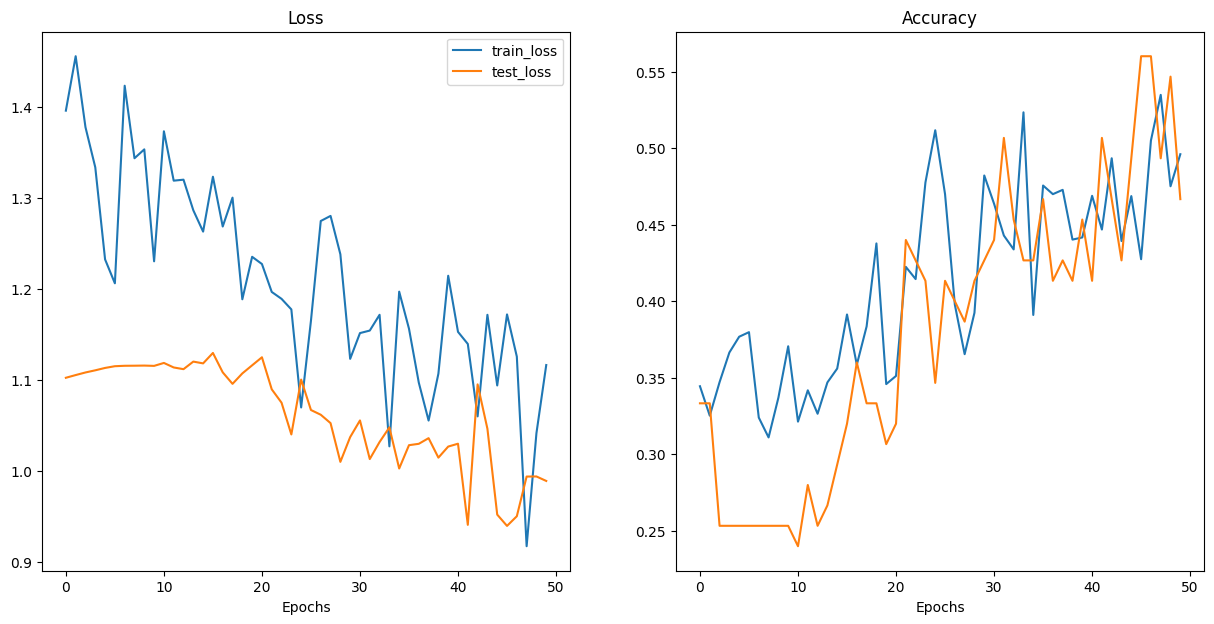

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like

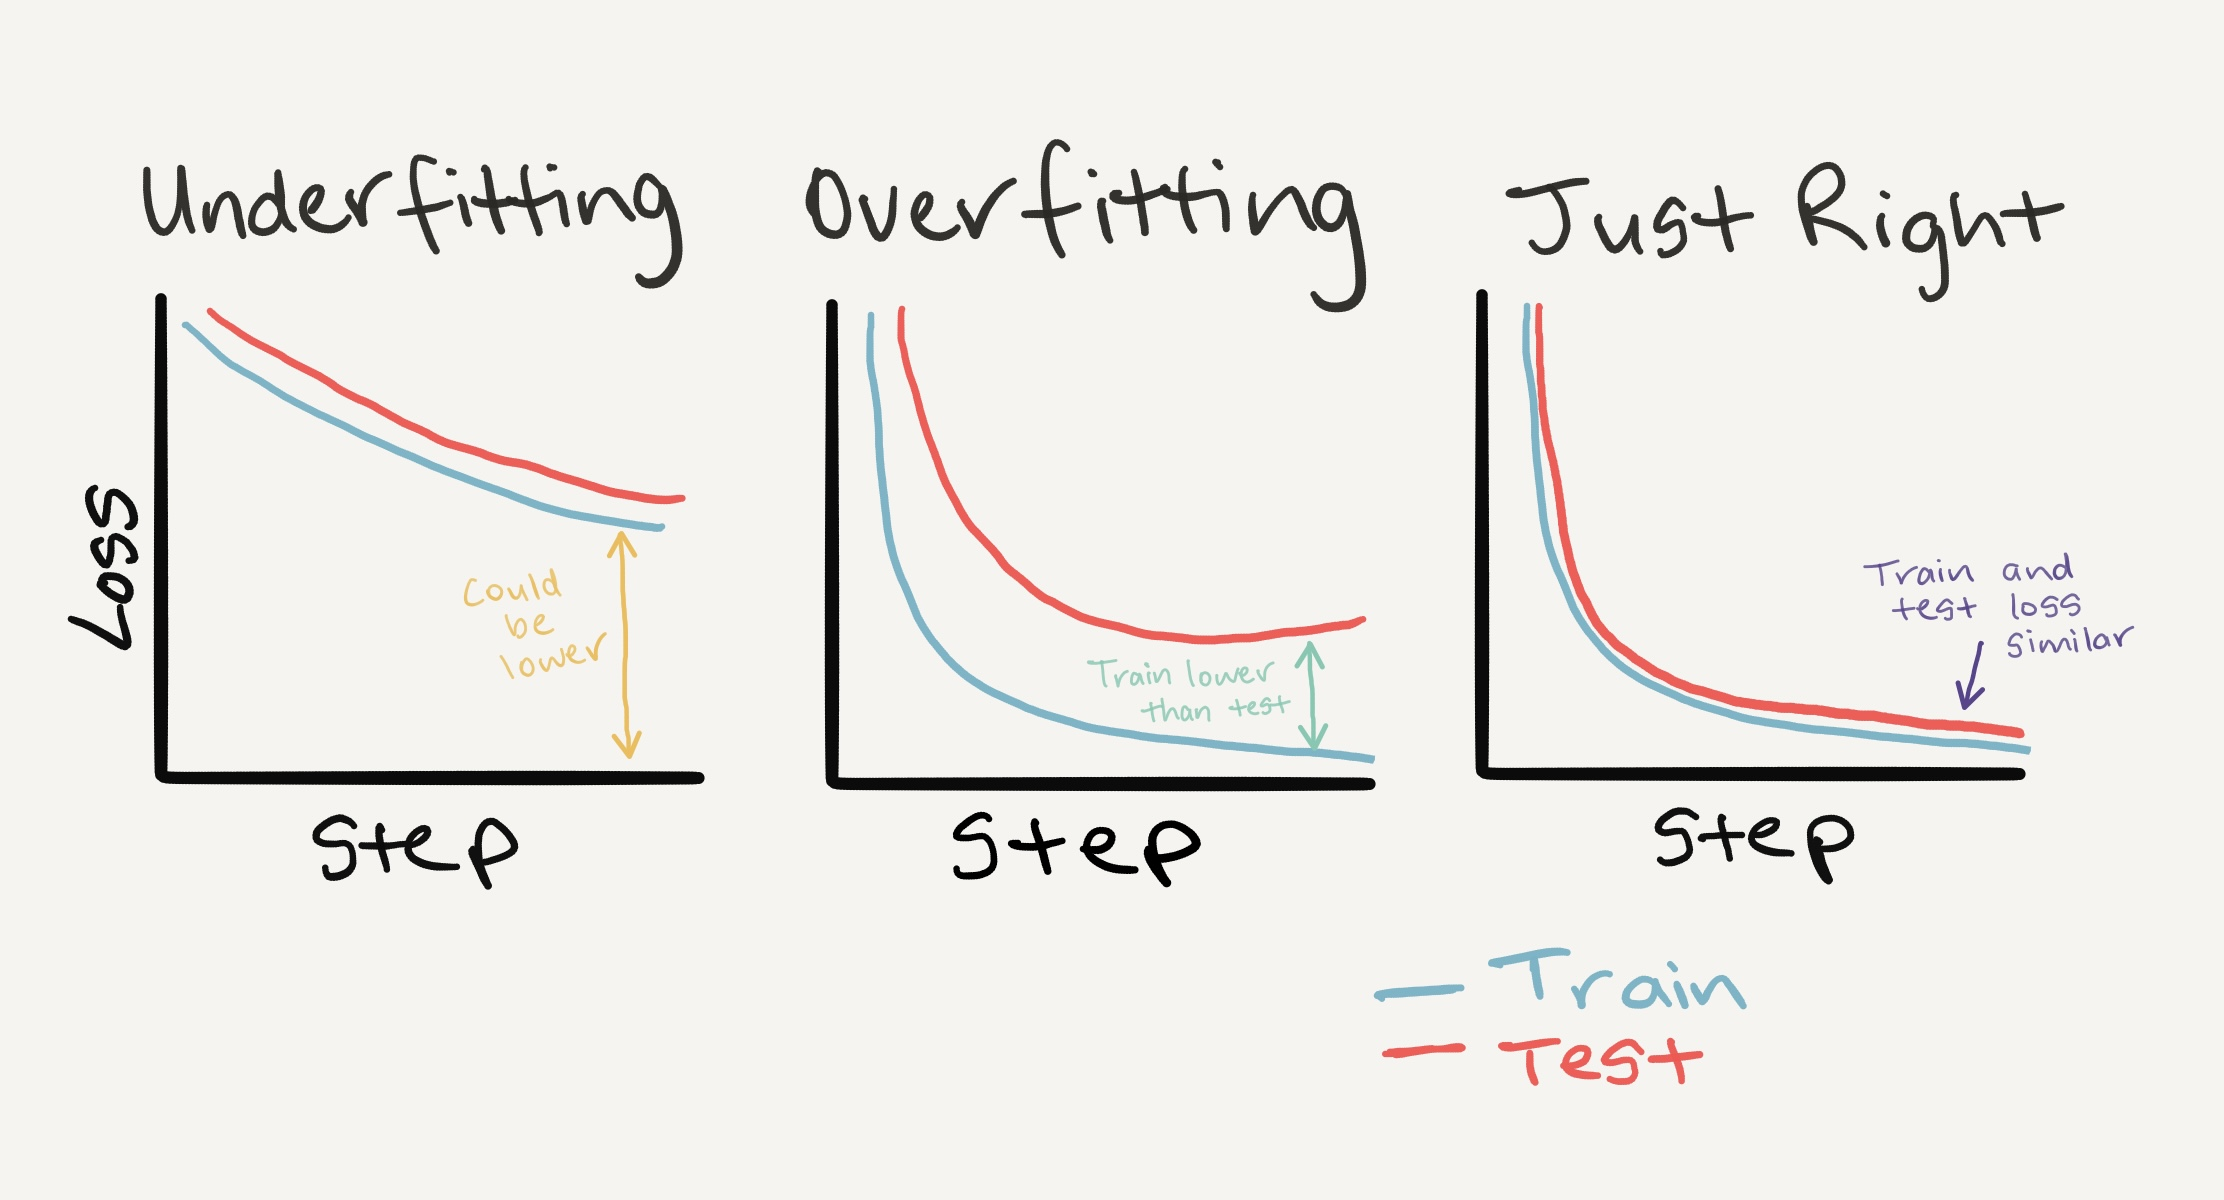

## 9. TinyVGG with Data Augmentation


### 9.1 Create transform with TriviailAugment

In [ ]:
# create training transforms with TriviailAugment
from torchvision import transforms
train_transform_triviail = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test Dataset's and DataLoader's with data augmentation


In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_triviail
)

test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform_simple
)

# data to dataloader
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader = DataLoader(
    test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7886022009d0>,
 <torch.utils.data.dataloader.DataLoader at 0x788601efa550>)

### 9.3 Create the Model 1

In [ ]:
# create the model
torch.manual_seed(42)

model_1 = TinyVGGModelV1(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_simple.classes)
).to(device)
model_1

TinyVGGModelV1(
  (features): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding

### 9.4 Train and evaluate

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 150

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
from tqdm.auto import tqdm

start_time = timer()

model_1_results = train(
    model=model_1,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    device=device
)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.6079 | Train acc: 0.7695 | Test loss: 3.3419 | Test acc: 0.2917
Epoch: 10 | Train loss: 0.5054 | Train acc: 0.7969 | Test loss: 0.9849 | Test acc: 0.5985
Epoch: 20 | Train loss: 0.4112 | Train acc: 0.8242 | Test loss: 1.1804 | Test acc: 0.6591
Epoch: 30 | Train loss: 0.4572 | Train acc: 0.8125 | Test loss: 1.2588 | Test acc: 0.6591
Epoch: 40 | Train loss: 0.7033 | Train acc: 0.7266 | Test loss: 0.7534 | Test acc: 0.7197
Epoch: 50 | Train loss: 0.6695 | Train acc: 0.6992 | Test loss: 1.1957 | Test acc: 0.6080
Epoch: 60 | Train loss: 0.7421 | Train acc: 0.7344 | Test loss: 0.8177 | Test acc: 0.6269
Epoch: 70 | Train loss: 0.6671 | Train acc: 0.7500 | Test loss: 0.9676 | Test acc: 0.6884
Epoch: 80 | Train loss: 0.8612 | Train acc: 0.6602 | Test loss: 1.4454 | Test acc: 0.6089
Epoch: 90 | Train loss: 0.9480 | Train acc: 0.7266 | Test loss: 1.2127 | Test acc: 0.5985
Epoch: 100 | Train loss: 0.6315 | Train acc: 0.7305 | Test loss: 2.1826 | Test acc: 0.4754
Epoch: 110

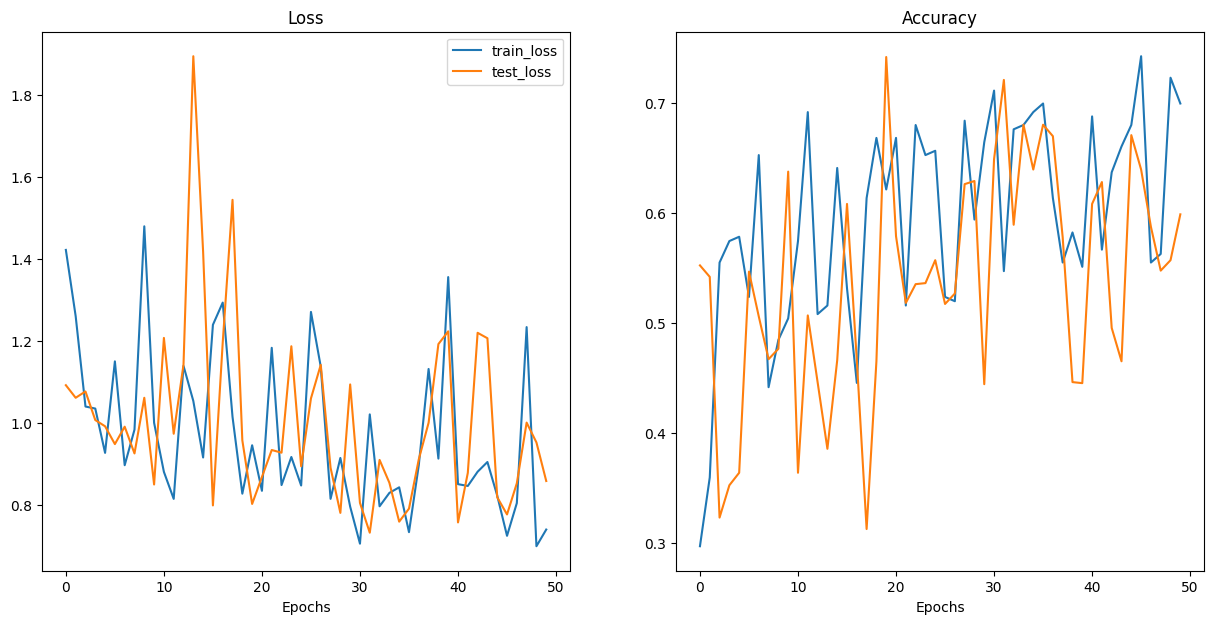

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0      1.513003   0.271988   1.099361  0.333333
1      1.341067   0.322608   1.099192  0.333333
2      1.517003   0.292767   1.099710  0.333333
3      1.342114   0.360100   1.100649  0.333333
4      1.296311   0.343065   1.101283  0.333333
..          ...        ...        ...       ...
145    0.831103   0.617872   0.904830  0.520000
146    0.937045   0.562097   0.903558  0.560000
147    0.853274   0.610382   0.882479  0.520000
148    0.919376   0.594274   0.957113  0.453333
149    0.875843   0.590851   1.018442  0.586667

[150 rows x 4 columns]

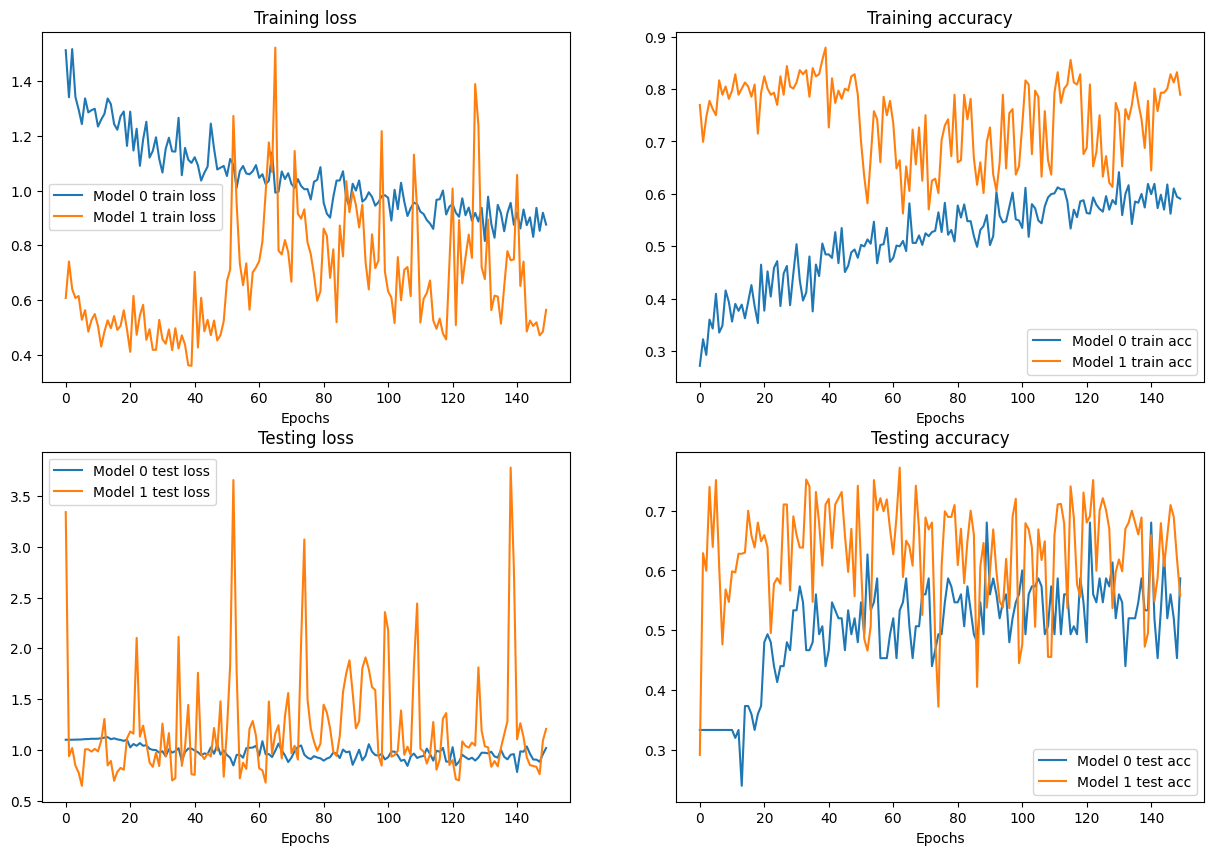

In [ ]:
# setup a plot
plt.figure(figsize=(15,10))

# Get no. of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0 train loss")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1 train loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.legend()

# PLot train accuracy
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0 train acc")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1 train acc")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot train loss
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0 test loss")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1 test loss")
plt.title("Testing loss")
plt.xlabel("Epochs")
plt.legend()

# plot test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0 test acc")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1 test acc")
plt.title("Testing accuracy")
plt.xlabel("Epochs")
plt.legend()

## 11. Making a prediction on a custom image

Although we've trained a model on custom data... how do you make a prediction on a sample/image that's not in either training or testing dataset.

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"
    print(f"Downloading image from: {image_url}")
    request = requests.get(image_url)
    image_data = request.content
    f.write(image_data)
    print("Downloaded image to: ", custom_image_path)
else:
  print(f"{custom_image_path} already exists")

Downloaded image to:  data/04-pizza-dad.jpeg


### 11.1 Loadig in a custom image with PyTorch

* In tensor form with datatypt (torch.float32)
* Of shape 64x64x3
* On the right device


In [ ]:
import torchvision

# Read in custom image
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image shape: {custom_image_unit8.shape}")
print(f"Custom image datatype: {custom_image_unit8.dtype}")

Custom image shape: torch.Size([3, 4032, 3024])
Custom image datatype: torch.uint8


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

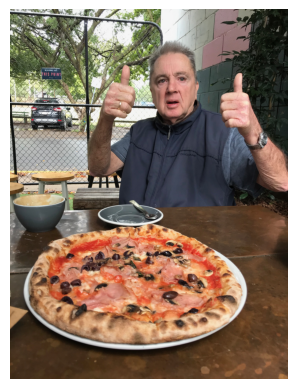

In [ ]:
plt.imshow(custom_image_unit8.permute(1,2,0))
plt.axis("off")

### 11.2 Making a prediction on a custom image with trained PyTorch model

In [ ]:
# Try to make prediction on an image in unit8 formate
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_unit8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
#load in the custom image and convert to torcch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

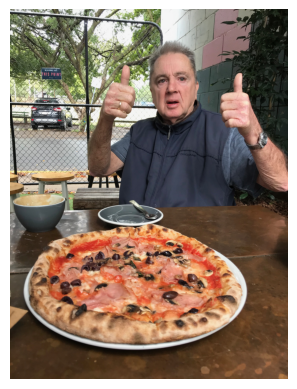

In [ ]:
plt.imshow(custom_image.permute(1,2,0))
plt.axis("off")

In [ ]:
# shape error
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [ ]:
custom_image.shape

torch.Size([3, 4032, 3024])

In [ ]:
# Create transform pipleline to resize image
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((64, 64))
])

# Transform
custom_image_transformed = transform(custom_image)
custom_image_transformed.shape

torch.Size([3, 64, 64])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

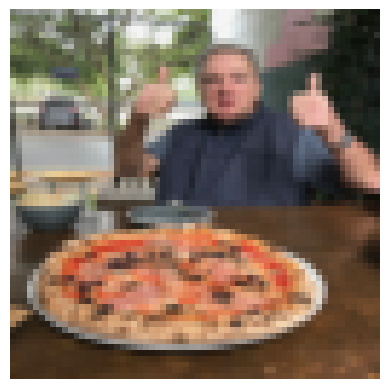

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))
plt.axis("off")

In [ ]:
# This will error batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))
custom_image_pred

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_0.eval()
with torch.inference_mode():
  custom_image_pred = model_0(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.5400, -2.0218, -0.8312]], device='cuda:0')

In [ ]:
# convert logits to pred probs
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.7513, 0.0580, 0.1907]], device='cuda:0')

In [ ]:
# Convert probs to labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([0], device='cuda:0')

In [ ]:
# find the pred label
class_names[custom_image_pred_label]

'pizza'

### 11.3 Putting custom image prediction together: building a function

In [ ]:
def pred_and_plot(model: torch.nn.Module,
                  image_path: str,
                  class_names: List[str]=None,
                  transform=None,
                  device=device):
  """Make a prediction on a target image with a trained model and plot the image and predictions"""
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image / 255.

  if(transform):
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(dim=0)
    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # plot the image
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
      title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)


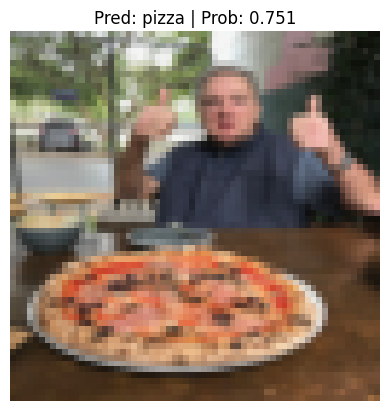

In [ ]:
pred_and_plot(
    model=model_0,
    image_path=custom_image_path,
    class_names=class_names,
    transform=transform
)